# Neural Language Modeling

### Recommended Reading

- Dan Jurafsky and James H. Martin's __Speech and Language Processing__ ([3rd ed. draft](https://web.stanford.edu/~jurafsky/slp3/))
- [Chapter 6: Vector Semantics and Embeddings](https://web.stanford.edu/~jurafsky/slp3/6.pdf) 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brownfortress/NLU-2024-labs/blob/main/labs/04_neural_LM.ipynb)

# Outline

#### Word Embeddings
- One-hot encoding
- TF-IDF
- Pointwise mutual information 

#### Word embedding similarity
- Cosine distance

#### Language modelling with Neural Networks

#### Neural Networks in Pytorch
- Embeddings
- Recurrent Neural Network (RNN)

#### Train and Test a Neural Network
- Optimizer
- Loss function
- Iteration over batches

# References
- RNN: https://d2l.ai/chapter_recurrent-neural-networks/index.html 
- LSTM: https://d2l.ai/chapter_recurrent-modern/lstm.html

## 1. Words as Vectors (Embeddings)
In natural language processing (NLP), [**word embedding**](https://en.wikipedia.org/wiki/Word_embedding) is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of language modeling and feature learning techniques where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves the mathematical embedding from space with many dimensions per word to a continuous vector space with a much lower dimension.
<br>
- Computing word embeddings is the process by which words are transformed into vectors of (real) numbers.
- Definition of meaning by distributional similarity/usage: similar words are close in "space"

### 1.1. One-Hot Encoding
- sparse vectors
- most basic way to turn a token into a vector
- method
    - associate a unique integer index with every word in a vocabulary of size $V$
    - turn this integer index $i$ into a binary vector of size $V$ (i.e. the size of the vocabulary)
    - the vector has all values `0` except for the $i$ th entry, which is `1`

## 2. Co-Occurence Matrices and Word as Vectors
### 2.1. Term-Document Matrix
- could be used to represent words, where dimension are documents
### 2.2. TF-IDF
- sparse vectors
- generally used to represent documents, where dimensions are words

#### TF: Term Frequency
$$\text{tf}_{t,d} = \text{count}(t,d)$$
$$\text{tf}_{t,d} = \log_{10}(\text{count}(t,d) + 1)$$

`+1` is because log of 0 is undefined.

Alternatively:

$$\text{tf}_{t,d} = 
\begin{cases}
1 + \log_{10}(\text{count}(t,d)), & \text{if count}(t,d) > 0\\
0, & \text{otherwise}
\end{cases}$$

#### IDF: Inverse Document Frequency

$$\text{idf}_t = \frac{N}{\text{df}_t}$$

Usually in log space, like term frequency.

$$\text{idf}_t = \log_{10}(\frac{N}{\text{df}_t})$$

- $\text{df}_t$ is the number of documents in which term $t$ occurs.
- $N$ is the total number of documents in the collection.

The __tf-idf__ weighted value $w_{t,d}$ for word $t$ in document $d$ is the combination of $\text{tf}_{t,d}$ and $\text{idf}_t$:

$$w_{t,d} = \text{tf}_{t,d} \times \text{idf}_t$$

### 2.3. Term-Term Matrix
- a.k.a. "word-word" or "word-context" matrix
- words are represented by a function of the counts of nearby words 
- size $|V| \times |V|$, where $V$ is the vocabulary size
    - usually context is taken to be a document or words in a window around the target word

### 2.4. Pointwise Mutual Information (PMI) and Positive Pointwise Mutual Information (PPMI)
- used for term-term matrices
- the best way to weigh the association between two words is to ask how much more the two words co-occur in our corpus than we would have a priori expected them to appear by chance.

#### 2.4.1. Pointwise Mutual Information (PMI)
- a measure of how often two events $x$ and $y$ occur, compared with what we would expect if they were independent:

$$I(x, y) = \log_2 \frac{P(x, y)}{P(x)P(y)}$$


The pointwise mutual information between a target word $w$ and a context word $c$ is defined as:

$$\text{PMI}(w, c) = \log_2 \frac{P(w, c)}{P(w)P(c)}$$

#### 2.4.2. Positive Pointwise Mutual Information (PMI)
- PMI values range from negative to positive infinity.
- negative PMI values (which imply things are co-occurring less often than we would expect by chance) tend to be unreliable
- it is more common to use Positive PMI (called PPMI) which replaces all negative PMI values with zero

$$\text{PPMI}(w, c) = \max(\log_2 \frac{P(w, c)}{P(w)P(c)}, 0)$$

#### 2.4.3. PPMI Matrix
To get a PPMI matrix from a co-occurrence matrix $F$, where $W$ rows are words and $C$ columns are contexts, and $f_{ij}$ is the number of times word $w_i$ appears in context $c_j$ (i.e. value of the cell).

$$P(w,c) = \frac{f_{ij}}{\sum_{i=1}^W \sum_{j=1}^C f_{ij}}$$

$$P(w) = \frac{\sum_{j=1}^C f_{ij}}{\sum_{i=1}^W \sum_{j=1}^C f_{ij}}$$

$$P(c) = \frac{\sum_{i=1}^W f_{ij}}{\sum_{i=1}^W \sum_{j=1}^C f_{ij}}$$

- PMI has the problem of being biased toward infrequent events: very rare words tend to have very high PMI values.
- Thus, $P(c)$ is computed as $P_{\alpha}(c)$ that raises the probability of the context word to the power of $\alpha$ (e.g. $0.75$)
    - Alternative is Laplace smoothing

$$\text{PPMI}_{\alpha}(w, c) = \max(\log_2 \frac{P(w, c)}{P(w)P_{\alpha}(c)}, 0)$$

$$P_{\alpha}(c) = \frac{\text{count}(c)^{\alpha}}{\sum_{c}\text{count}(c)^{\alpha}}$$

## 3. Vector Similarity
- Two words are similar in meaning if their context __vectors__ are similar;
- __Cosine similarity__ measures the similarity between two vectors of an __inner product space__. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.

### 3.1. Dot Product

- dot product (inner product)

$$\vec{v}\cdot\vec{w} = \sum^N_{i=1}v_i w_i = v_1 w_1 + v_2 w_2 + ... + v_N w_N$$

- vector length (L2 norm $||v||_2$)

$$|\vec{v}| = \sqrt{\sum^N_{i=1} v_i^2}$$ 

$$ |\vec{v}| = \sqrt{\vec{v}\cdot\vec{v}} = \sqrt{\sum^N_{i=1} v_i v_i} = \sqrt{\sum^N_{i=1} v_1 v_1 + v_2 v_2 + ... + v_N v_N}$$

### 3.2. Cosine Similarity

- L2 normalized dot product of 2 vectors
    - $\theta$ is the angle between $\vec{v}$ and $\vec{w}$

$$\vec{v}\cdot\vec{w} = |\vec{v}||\vec{w}|\cos\theta$$

$$\cos\theta = \frac{\vec{v}\cdot\vec{w}}{|\vec{v}||\vec{w}|}$$

$$\text{CosSim}(\vec{v},\vec{w}) = \frac{\vec{v}\cdot\vec{w}}{|\vec{v}||\vec{w}|} = \frac{\sum^N_{i=1}v_i w_i}{\sqrt{\sum^N_{i=1} v_i^2} \sqrt{\sum^N_{i=1} w_i^2}}$$

#### Cosine Distance
$$\text{Cosine Distance}(\vec{v}, \vec{w}) = 1 - \text{Cosine Similarity}(\vec{v}, \vec{w})$$

In [226]:
# Run this if you are on Colab
# !python -m spacy download en_core_web_lg

In [227]:
import spacy
import numpy as np

nlp = spacy.load('en_core_web_lg')
txt = 'metropolis'
doc = nlp(txt)

tok = doc[0]  # let's take Rome

print("string:", tok.text)
print("vector dimension:", len(tok.vector))
print("spacy vector norm:", tok.vector_norm)

string: metropolis
vector dimension: 300
spacy vector norm: 29.364471


In [228]:
from scipy.spatial.distance import cosine

# let's get Paris & compare its vector to rome
paris = nlp('city')[0]
print(paris.text)

print("spacy CosSim({}, {}):".format(tok.text, paris.text), tok.similarity(paris))
print("scipy CosSim({}, {}):".format(tok.text, paris.text), 1 - cosine(tok.vector, paris.vector))

tok2 = nlp('computer')[0]
print(tok2.text)
print("spacy CosSim({}, {}):".format(tok.text, tok2.text), tok.similarity(tok2))
print("scipy CosSim({}, {}):".format(tok.text, tok2.text), 1 - cosine(tok.vector, tok2.vector))


city
spacy CosSim(metropolis, city): 0.7197579741477966
scipy CosSim(metropolis, city): 0.7197579849058193
computer
spacy CosSim(metropolis, computer): 0.1560775339603424
scipy CosSim(metropolis, computer): 0.15607754939864682


If you want to introduce the concept of word embedding to a friend, [Semantle](https://semantle.com) game is a good starting point. It is based on word2vec model.  

# 4 Language Models with Neural Networks

While we have already seen a language model based on n-grams, in this lab we are going to develop a language model using a neural architecture. Neural LM can be used to compute word embeddings.

## 4.1 Task definition

To model the probability distribution over a sequence, we are going to use the Chain Rule as we have seen in LAB 3:

$$P(w_{1}^{n}) = P(w_1) P(w_2|w_1) P(w_3|w_1^2) ... P(w_n|w_{1}^{n-1}) = \prod_{i=1}^{n}{P(w_i|w_{1}^{i-1})}$$

However, at that time we used ngram to truncate the previous context ($N-1$), to compute meaningful probabilities. While using neural models, we will let the model decide by itself how to manage the previous context and thus which are the tokens relevant for the prediction.


## 4.2 Recurrent Neural Networks (RNN)

One of the most suitable neural architectures for the Language Model task is the Recurrent Neural Network (RNN). The architecture is composed of an RNN layer (vanilla, LSTM, GRU) and a linear+softmax layer that outputs the probability over the dictionary. Indeed, the size of the output vector is equal to the size of the dictionary, i.e. the model cannot predict tokens that are not present in the vocabulary. <br>

> LM task in RNN can be tackled as a sequence labelling task (each input token has an output label) in which the input sequence is $ input = \{w_1, w_2, w_{n-1}\}$ and the output is $ output = \{w_2, w_3, w_{n}\}$



***Example***:
 > For the input sentence ***"I go to Miami"***, the input sequence of the model is ***"I go to"*** and the target/output sequence is ***"go to Miami"***.



***Notice***:

> - To properly model the sequence probabilities we need to add boundary markers \<s\> and \</s\>.

> - However, in LM RNN only the end of sentence token \</s\> is usually used unless we need \<s\> for some reason.

<p align="center">
    <img src="https://i.postimg.cc/zGH99MFY/rnn-lm.png" alt="drawing" width="300"/>
</p>
In the image below you can see a working example of a language model with RNN. 
<p align="center">
    <img src="https://i.postimg.cc/fydQNrYP/LM-RNN.png" alt="drawing" width="300"/>
</p>


# 5 Model architecture 


Here we define the architecture of our model using PyTorch. In the `__init__` method, we define the class of our model and we instantiate all the layers that we are going to use. In the `forward` method we define the interactions among the instantiated layers, in other words, we design the architecture of the model.   

In [229]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import math
import numpy as np

# RNN Elman version
# We are not going to use this since for efficiently purposes it's better to use the RNN layer provided by pytorch  

class RNN_cell(nn.Module):
    def __init__(self,  hidden_size, input_size, output_size, vocab_size, dropout=0.1):
        super(RNN_cell, self).__init__()
        
        self.W = nn.Linear(input_size, hidden_size, bias=False)
        self.U = nn.Linear(hidden_size, hidden_size)
        self.V = nn.Linear(hidden_size, vocab_size)
        self.vocab_size = vocab_size
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, prev_hidden, word):
        input_emb = self.W(word)
        prev_hidden_rep = self.U(prev_hidden)
        # ht = σ(Wx + Uht-1 + b)
        hidden_state = self.sigmoid(input_emb + prev_hidden_rep)
        # yt = σ(Vht + b)
        output = self.output(hidden_state)
        return hidden_state, output

In [230]:
class LM_RNN(nn.Module):
    def __init__(self, emb_size, hidden_size, output_size, pad_index=0, out_dropout=0.1,
                 emb_dropout=0.1, n_layers=1):
        super(LM_RNN, self).__init__()
        # Token ids to vectors, we will better see this in the next lab 
        self.embedding = nn.Embedding(output_size, emb_size, padding_idx=pad_index)
        # Pytorch's RNN layer: https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
        self.rnn = nn.RNN(emb_size, hidden_size, n_layers, bidirectional=False, batch_first=True)    
        self.pad_token = pad_index
        # Linear layer to project the hidden layer to our output space 
        self.output = nn.Linear(hidden_size, output_size)
        
    def forward(self, input_sequence):
        emb = self.embedding(input_sequence)
        rnn_out, _  = self.rnn(emb)
        output = self.output(rnn_out).permute(0,2,1)
        return output 

In [231]:
class LSTM_RNN(nn.Module):
    def __init__(self, emb_size, hidden_size, output_size, pad_index=0, out_dropout=0.1, emb_dropout=0.1, n_layers=1):
        super(LSTM_RNN, self).__init__()
        # Token ids to vectors, we will better see this in the next lab
        self.embedding = nn.Embedding(output_size, emb_size, padding_idx=pad_index)
        
        # Pytorch's RNN layer: https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
        self.lstm = nn.LSTM(emb_size, hidden_size, n_layers, bidirectional=False, batch_first=True)
        self.pad_token = pad_index

        # Linear layer to project the hidden layer to our output space
        self.output = nn.Linear(hidden_size, output_size)

        self.output.weight = self.embedding.weight


    def forward(self, input_sequence):
        emb = self.embedding(input_sequence)
        lstm_out, _  = self.lstm(emb)
        output = self.output(lstm_out).permute(0,2,1)
        return output

In [232]:
class LSTM_RNN_DROP(nn.Module):
    def __init__(self, emb_size, hidden_size, output_size, pad_index=0, out_dropout=0.1, emb_dropout=0.1, n_layers=1):
        super(LSTM_RNN_DROP, self).__init__()
        # Token ids to vectors, we will better see this in the next lab
        self.embedding = nn.Embedding(output_size, emb_size, padding_idx=pad_index)
        # Add one dropout layer after the embedding layer
        self.emb_dropout = nn.Dropout(emb_dropout)

        # Pytorch's RNN layer: https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
        self.lstm = nn.LSTM(emb_size, hidden_size, n_layers, bidirectional=False, batch_first=True)
        self.pad_token = pad_index

        # Add one dropout layer before the last linear layer
        self.out_dropout = nn.Dropout(out_dropout)

        # Linear layer to project the hidden layer to our output space
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, input_sequence):
        emb = self.embedding(input_sequence)
        drop1 = self.emb_dropout(emb)
        lstm_out, _  = self.lstm(drop1)
        drop2 = self.out_dropout(lstm_out)
        output = self.output(drop2).permute(0,2,1)
        return output

# 6 Data loading 

We are going to see this part in details in the next lab. Anyhow, let's have an overview. 

In [233]:
DEVICE = 'cuda:0' # it can be changed with 'cpu' if you do not have a gpu

In [234]:
# Loading the corpus 

def read_file(path, eos_token="<eos>"):
    output = []
    with open(path, "r") as f:
        for line in f.readlines():
            output.append(line.strip() + " " + eos_token)
    return output

# Vocab with tokens to ids
def get_vocab(corpus, special_tokens=[]):
    output = {}
    i = 0 
    for st in special_tokens:
        output[st] = i
        i += 1
    for sentence in corpus:
        for w in sentence.split():
            if w not in output:
                output[w] = i
                i += 1
    return output

In [235]:
# If you are using Colab, run these lines
# !wget -P dataset/PennTreeBank https://raw.githubusercontent.com/BrownFortress/NLU-2024-Labs/main/labs/dataset/PennTreeBank/ptb.test.txt
# !wget -P dataset/PennTreeBank https://raw.githubusercontent.com/BrownFortress/NLU-2024-Labs/main/labs/dataset/PennTreeBank/ptb.valid.txt
# !wget -P dataset/PennTreeBank https://raw.githubusercontent.com/BrownFortress/NLU-2024-Labs/main/labs/dataset/PennTreeBank/ptb.train.txt

In [236]:

train_raw = read_file("dataset/PennTreeBank/ptb.train.txt")
dev_raw = read_file("dataset/PennTreeBank/ptb.valid.txt")
test_raw = read_file("dataset/PennTreeBank/ptb.test.txt")


In [237]:
# Vocab is computed only on training set 
# We add two special tokens end of sentence and padding 
vocab = get_vocab(train_raw, ["<pad>", "<eos>"])

In [238]:
len(vocab)

10001

In [239]:
# This class computes and stores our vocab 
# Word to ids and ids to word
class Lang():
    def __init__(self, corpus, special_tokens=[]):
        self.word2id = self.get_vocab(corpus, special_tokens)
        self.id2word = {v:k for k, v in self.word2id.items()}
    def get_vocab(self, corpus, special_tokens=[]):
        output = {}
        i = 0 
        for st in special_tokens:
            output[st] = i
            i += 1
        for sentence in corpus:
            for w in sentence.split():
                if w not in output:
                    output[w] = i
                    i += 1
        return output
    

In [240]:
lang = Lang(train_raw, ["<pad>", "<eos>"])

In [241]:
import torch
import torch.utils.data as data

class PennTreeBank (data.Dataset):
    # Mandatory methods are __init__, __len__ and __getitem__
    def __init__(self, corpus, lang):
        self.source = []
        self.target = []
        
        for sentence in corpus:
            self.source.append(sentence.split()[0:-1]) # We get from the first token till the second-last token
            self.target.append(sentence.split()[1:]) # We get from the second token till the last token
            # See example in section 6.2
        
        self.source_ids = self.mapping_seq(self.source, lang)
        self.target_ids = self.mapping_seq(self.target, lang)

    def __len__(self):
        return len(self.source)

    def __getitem__(self, idx):
        src= torch.LongTensor(self.source_ids[idx])
        trg = torch.LongTensor(self.target_ids[idx])
        sample = {'source': src, 'target': trg}
        return sample
    
    # Auxiliary methods
    
    def mapping_seq(self, data, lang): # Map sequences of tokens to corresponding computed in Lang class
        res = []
        for seq in data:
            tmp_seq = []
            for x in seq:
                if x in lang.word2id:
                    tmp_seq.append(lang.word2id[x])
                else:
                    print('OOV found!')
                    print('You have to deal with that') # PennTreeBank doesn't have OOV but "Trust is good, control is better!"
                    break
            res.append(tmp_seq)
        return res

In [242]:
train_dataset = PennTreeBank(train_raw, lang)
dev_dataset = PennTreeBank(dev_raw, lang)
test_dataset = PennTreeBank(test_raw, lang)

In [243]:
from functools import partial
from torch.utils.data import DataLoader

def collate_fn(data, pad_token):
    def merge(sequences):
        '''
        merge from batch * sent_len to batch * max_len 
        '''
        lengths = [len(seq) for seq in sequences]
        max_len = 1 if max(lengths)==0 else max(lengths)
        # Pad token is zero in our case
        # So we create a matrix full of PAD_TOKEN (i.e. 0) with the shape 
        # batch_size X maximum length of a sequence
        padded_seqs = torch.LongTensor(len(sequences),max_len).fill_(pad_token)
        for i, seq in enumerate(sequences):
            end = lengths[i]
            padded_seqs[i, :end] = seq # We copy each sequence into the matrix
        padded_seqs = padded_seqs.detach()  # We remove these tensors from the computational graph
        return padded_seqs, lengths
    
    # Sort data by seq lengths

    data.sort(key=lambda x: len(x["source"]), reverse=True) 
    new_item = {}
    for key in data[0].keys():
        new_item[key] = [d[key] for d in data]

    source, _ = merge(new_item["source"])
    target, lengths = merge(new_item["target"])
    
    new_item["source"] = source.to(DEVICE)
    new_item["target"] = target.to(DEVICE)
    new_item["number_tokens"] = sum(lengths)
    return new_item

# Dataloader instantiation
# You can reduce the batch_size if the GPU memory is not enough
train_loader = DataLoader(train_dataset, batch_size=64, collate_fn=partial(collate_fn, pad_token=lang.word2id["<pad>"]),  shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=128, collate_fn=partial(collate_fn, pad_token=lang.word2id["<pad>"]))
test_loader = DataLoader(test_dataset, batch_size=128, collate_fn=partial(collate_fn, pad_token=lang.word2id["<pad>"]))

# 7 Train and validate the model 

In [244]:
import math
def train_loop(data, optimizer, criterion, model, clip=5):
    model.train()
    loss_array = []
    number_of_tokens = []
    
    for sample in data:
        optimizer.zero_grad() # Zeroing the gradient
        output = model(sample['source'])
        loss = criterion(output, sample['target'])
        loss_array.append(loss.item() * sample["number_tokens"])
        number_of_tokens.append(sample["number_tokens"])
        loss.backward() # Compute the gradient, deleting the computational graph
        # clip the gradient to avoid explosioning gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)  
        optimizer.step() # Update the weights
        
    ppl = math.exp(sum(loss_array) / sum(number_of_tokens))
    loss_to_return = sum(loss_array) / sum(number_of_tokens)
    return ppl, loss_to_return    

def eval_loop(data, eval_criterion, model):
    model.eval()
    loss_to_return = []
    loss_array = []
    number_of_tokens = []
    # softmax = nn.Softmax(dim=1) # Use Softmax if you need the actual probability
    with torch.no_grad(): # It used to avoid the creation of computational graph
        for sample in data:
            output = model(sample['source'])
            loss = eval_criterion(output, sample['target'])
            loss_array.append(loss.item())
            number_of_tokens.append(sample["number_tokens"])
            
    ppl = math.exp(sum(loss_array) / sum(number_of_tokens))
    loss_to_return = sum(loss_array) / sum(number_of_tokens)
    return ppl, loss_to_return

def init_weights(mat):
    for m in mat.modules():
        if type(m) in [nn.GRU, nn.LSTM, nn.RNN]:
            for name, param in m.named_parameters():
                if 'weight_ih' in name:
                    for idx in range(4):
                        mul = param.shape[0]//4
                        torch.nn.init.xavier_uniform_(param[idx*mul:(idx+1)*mul])
                elif 'weight_hh' in name:
                    for idx in range(4):
                        mul = param.shape[0]//4
                        torch.nn.init.orthogonal_(param[idx*mul:(idx+1)*mul])
                elif 'bias' in name:
                    param.data.fill_(0)
        else:
            if type(m) in [nn.Linear]:
                torch.nn.init.uniform_(m.weight, -0.01, 0.01)
                if m.bias != None:
                    m.bias.data.fill_(0.01)

In [245]:
import torch.optim as optim
# Experiment also with a smaller or bigger model by changing hid and emb sizes
# A large model tends to overfit
hid_size = 300
emb_size = 300

# Don't forget to experiment with a lower training batch size
# Increasing the back propagation steps can be seen as a regularization step

# With SGD try with an higher learning rate (> 1 for instance)
lr = 2 # This is definitely not good for SGD
clip = 5 # Clip the gradient
device = 'cuda:0'

vocab_len = len(lang.word2id)

model = LSTM_RNN(emb_size, hid_size, vocab_len, pad_index=lang.word2id["<pad>"]).to(device)
model.apply(init_weights)

optimizer = optim.SGD(model.parameters(), lr=lr)
criterion_train = nn.CrossEntropyLoss(ignore_index=lang.word2id["<pad>"])
criterion_eval = nn.CrossEntropyLoss(ignore_index=lang.word2id["<pad>"], reduction='sum')

In [246]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import math

n_epochs = 100
patience = 3
losses_train = []
losses_dev = []
sampled_epochs = []
best_ppl = math.inf
best_model = None
pbar = tqdm(range(1,n_epochs))
array_ppl_train = []
array_loss_train = []
array_ppl_dev = []
array_loss_dev = []

#If the PPL is too high try to change the learning rate
for epoch in pbar:
    ppl_train, loss_train = train_loop(train_loader, optimizer, criterion_train, model, clip)
    array_ppl_train.append(ppl_train)
    array_loss_train.append(loss_train)

    if epoch % 1 == 0:
        sampled_epochs.append(epoch)
        losses_train.append(np.asarray(loss_train).mean())
        ppl_dev, loss_dev = eval_loop(dev_loader, criterion_eval, model)
        array_ppl_dev.append(ppl_dev)
        array_loss_dev.append(loss_dev)

        losses_dev.append(np.asarray(loss_dev).mean())
        pbar.set_description("PPL: %f" % ppl_dev)
        
        if  ppl_dev < best_ppl: # the lower, the better
            best_ppl = ppl_dev
            best_model = copy.deepcopy(model).to('cpu')
            patience = 3
        else:
            patience -= 1

        if patience <= 0: # Early stopping with patience
            break # Not nice but it keeps the code clean

best_model.to(device)
final_ppl,  _ = eval_loop(test_loader, criterion_eval, best_model)
print('Test ppl: ', final_ppl)

PPL: 164.248454:   5%|▌         | 5/99 [00:58<18:19, 11.70s/it]


Test ppl:  148.52025771002914


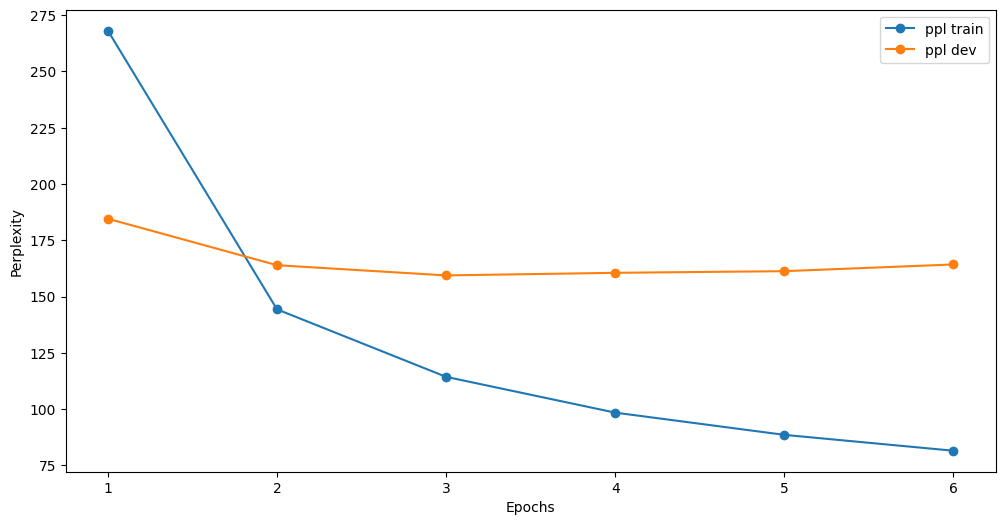

In [247]:
import os

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sampled_epochs, array_ppl_train, marker='o', label='ppl train')  # Add marker='o' for points
ax.plot(sampled_epochs, array_ppl_dev, marker='o', label='ppl dev')  # Add marker='o' for points

ax.set_xlabel('Epochs')  # Set x-axis label
ax.set_ylabel('Perplexity')  # Set y-axis label

ax.legend()

path_folder = "/home/disi/NLU_assignments/assignment_1/part_2/D_2"

if not os.path.exists(path_folder):
    os.makedirs(path_folder)

plt.savefig(f"{path_folder}/ppl_plot.pdf")

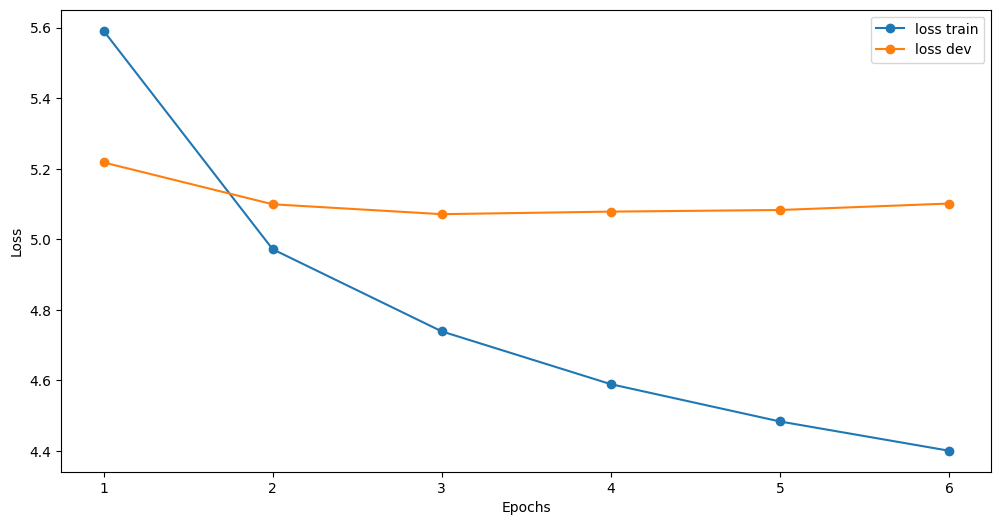

In [248]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sampled_epochs, array_loss_train, marker='o', label='loss train')  # Add marker='o' for points
ax.plot(sampled_epochs, array_loss_dev, marker='o', label='loss dev')  # Add marker='o' for points

ax.set_xlabel('Epochs')  # Set x-axis label
ax.set_ylabel('Loss')  # Set y-axis label

ax.legend()

plt.savefig(f"{path_folder}/loss_plot.pdf")

In [249]:
# Text to be saved
text_to_save = f"Parameters:\n\nepochs = {epoch-1}\nlr = {lr}\nhid_layers = {hid_size}\nemb_layers = {emb_size}\nclip = {clip} \n\nBest ppl = {final_ppl}"

# Specify the file name
file_name = f"{path_folder}/parameters.txt"

# Open the file in write mode ("w" flag)
with open(file_name, "w") as file:
    # Write the text to the file
    file.write(text_to_save)

If your model makes you happy and you want to reuse it, you have [to save it and load it](https://pytorch.org/tutorials/beginner/saving_loading_models.html). 
In PyTorch this is straightforward.

In [250]:
# To save the model
# path = 'model_bin/model_name.pt'
# torch.save(model.state_dict(), path)
# To load the model you need to initialize it
# model = LM_RNN(emb_size, hid_size, vocab_len, pad_index=lang.word2id["<pad>"]).to(device)
# Then you load it
# model.load_state_dict(torch.load(path))

# Mandatory Exam Exercise
## Part 1 (4 points)
In this, you have to modify the baseline LM_RNN by adding a set of techniques that might improve the performance. In this, you have to add one modification at a time incrementally. If adding a modification decreases the performance, you can remove it and move forward with the others. However, in the report, you have to provide and comment on this unsuccessful experiment.  For each of your experiments, you have to print the performance expressed with Perplexity (PPL).
<br>
One of the important tasks of training a neural network is  hyperparameter optimization. Thus, you have to play with the hyperparameters to minimise the PPL and thus print the results achieved with the best configuration (in particular <b>the learning rate</b>). 
These are two links to the state-of-the-art papers which use vanilla RNN [paper1](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5947611), [paper2](https://www.fit.vutbr.cz/research/groups/speech/publi/2010/mikolov_interspeech2010_IS100722.pdf). 

**Mandatory requirements**: For the following experiments the perplexity must be below 250 (***PPL < 250***).

1. Replace RNN with a Long-Short Term Memory (LSTM) network --> [link](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)
2. Add two dropout layers: --> [link](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
    - one after the embedding layer, 
    - one before the last linear layer
3. Replace SGD with AdamW --> [link](https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html)

## Part 2 (11 points)
**Mandatory requirements**: For the following experiments the perplexity must be below 250 (***PPL < 250***) and it should be lower than the one achieved in Part 1.1 (i.e. base LSTM).

Starting from the `LM_RNN` in which you replaced the RNN with a LSTM model, apply the following regularisation techniques:
- Weight Tying 
- Variational Dropout (no DropConnect)
- Non-monotonically Triggered AvSGD 

These techniques are described in [this paper](https://openreview.net/pdf?id=SyyGPP0TZ).
